<center><h1>Mean-Shift</h1></center>
<hr/>

#### Imports

In [1]:
from ex2_utils import *
import matplotlib.pyplot as plt

<hr/>

### Mean-Shift mode seeking 

In [2]:
def mean_shift(image: np.ndarray, position: tuple, h: int, get_all_positions: bool = False):
    assert h % 2 != 0, 'h must be odd!'
    assert position[0] in range(image.shape[1]) and position[1] in range(image.shape[0]), 'pos must be within image boundaries!'

    n = h // 2
    yi, xi = np.indices((h, h)) - n
    
    I = np.pad(image, n, mode = "constant")
    positions = [(position[0]+n, position[1]+n)]

    while True:
        wi = I[positions[-1][1]-n: positions[-1][1]+n+1, positions[-1][0]-n: positions[-1][0]+n+1]
        
        if np.sum(wi) == 0:
            break
        
        wi = wi / wi.sum()
        shift_vector = np.round(np.sum(wi * (xi, yi), axis=(1, 2)) / wi.sum()).astype(int)
        
        if np.linalg.norm(shift_vector) == 0:
            break

        positions.append(np.clip(positions[-1] + shift_vector, (n, n), (I.shape[1]-1, I.shape[0]-1)))
        if (positions[-2][0] == positions[-1][0]) and (positions[-2][1] == positions[-1][1]):
            break
        
    return [(position[0]-n, position[1]-n) for position in positions] if get_all_positions else [positions[-1][0]-n, positions[-1][1]-n]

Starting position: (40, 40)
Number of iterations: 14
Final position: (51, 68)
Function value: 0.001585373


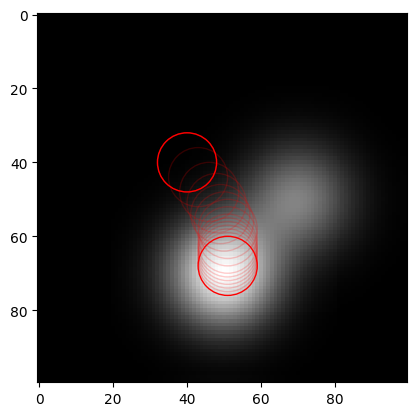

In [3]:
img = generate_responses_1()
fig, ax = plt.subplots()

h = 17
pos = (40, 40)

print("Starting position:", pos)
ax.add_patch(plt.Circle(pos, h//2, color = 'r', fill = False, alpha = 1))
positions = mean_shift(img, pos, h, get_all_positions=True)

for pos in positions[:-1]:
    ax.add_patch(plt.Circle(pos, h//2, color = 'r', fill = False, alpha = .2))

print("Number of iterations:", len(positions)-1)
print("Final position:", positions[-1])
print("Function value:", img[positions[-1][1], positions[-1][0]])

ax.add_patch(plt.Circle(positions[-1], h//2, color = 'r', fill = False, alpha = 1))
plt.imshow(img, 'gray')
plt.show()

#### Testing the mean-shift algorithm on different PDFs

In [4]:
def generate_responses_2():
    responses = np.zeros((100, 100), dtype=np.float32)
    responses[40, 40] = 1
    responses[60, 60] = 0.5
    return gausssmooth(responses, 10)

Starting position: (30, 70)
Number of iterations: 14
Final position: (41, 42)
Function value: 0.001585373


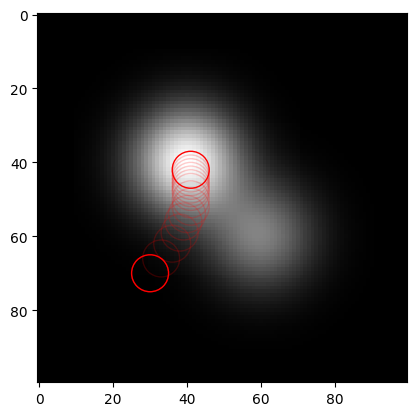

In [5]:
img = generate_responses_2()
fig, ax = plt.subplots()

h = 11
pos = (30, 70)

print("Starting position:", pos)
ax.add_patch(plt.Circle(pos, h//2, color = 'r', fill = False, alpha = 1))
positions = mean_shift(img, pos, 17, get_all_positions=True)

for pos in positions[:-1]:
    ax.add_patch(plt.Circle(pos, h//2, color = 'r', fill = False, alpha = .2))

print("Number of iterations:", len(positions)-1)
print("Final position:", positions[-1])
print("Function value:", img[positions[-1][1], positions[-1][0]])

ax.add_patch(plt.Circle(positions[-1], h//2, color = 'r', fill = False, alpha = 1))
plt.imshow(img, 'gray')
plt.show()

In [6]:
def generate_responses_3():
    responses = np.zeros((100, 100), dtype=np.float32)
    responses[20, 40] = 1.0
    responses[40, 20] = 0.5
    responses[80, 60] = 0.5
    responses[60, 80] = 0.5
    return gausssmooth(responses, 10)

Starting position: (50, 50)
Number of iterations: 15
Final position: (40, 22)
Function value: 0.0015885793


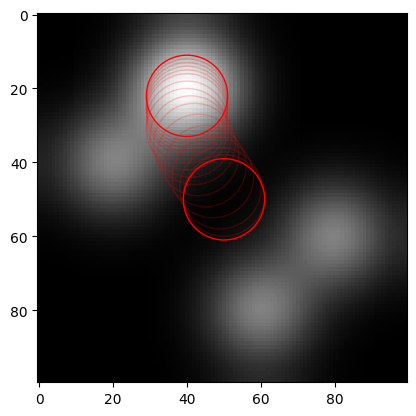

In [7]:
img = generate_responses_3()
fig, ax = plt.subplots()

h = 23
pos = (50, 50)

print("Starting position:", pos)
ax.add_patch(plt.Circle(pos, h//2, color = 'r', fill = False, alpha = 1))
positions = mean_shift(img, pos, 17, get_all_positions=True)

for pos in positions[:-1]:
    ax.add_patch(plt.Circle(pos, h//2, color = 'r', fill = False, alpha = .2))

print("Number of iterations:", len(positions)-1)
print("Final position:", positions[-1])
print("Function value:", img[positions[-1][1], positions[-1][0]])

ax.add_patch(plt.Circle(positions[-1], h//2, color = 'r', fill = False, alpha = 1))
plt.imshow(img, 'gray')
plt.show()